In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time as t

In [206]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    ! ls
except: ModuleNotFoundError

In [207]:
file_name = 'df_final.csv'
drive_path = '/content/drive/My Drive/1-Master/Projekte und Ideen/fussball/scraper/df_final.csv'

try:
    df_org = pd.read_csv(drive_path, sep=',', index_col=0)
except:
    df_org = pd.read_csv(file_name, sep=',', index_col=0)

In [208]:
df = df_org.copy()

In [209]:
df.weekday = df.weekday.astype(str)
df.day = df.day.astype(str)
df.month = df.month.astype(str)
df.year = df.year.astype(str)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5158 entries, 0 to 5157
Data columns (total 68 columns):
weekday                         5158 non-null object
day                             5158 non-null object
month                           5158 non-null object
year                            5158 non-null object
home_team_break                 5158 non-null object
guest_team_break                5158 non-null object
date                            5158 non-null object
time                            5158 non-null object
home_team_name                  5158 non-null object
guest_team_name                 5158 non-null object
competition                     5158 non-null object
saison                          5158 non-null object
gameday                         5158 non-null object
home_coach                      5158 non-null object
guest_coach                     5158 non-null object
resultNumeric                   5152 non-null float64
homeTotalGoalsShoot             5158 non-nul

In [211]:
df.columns

Index(['weekday', 'day', 'month', 'year', 'home_team_break',
       'guest_team_break', 'date', 'time', 'home_team_name', 'guest_team_name',
       'competition', 'saison', 'gameday', 'home_coach', 'guest_coach',
       'resultNumeric', 'homeTotalGoalsShoot', 'homeTotalGoalsReceived',
       'homeTotalGoalDiff', 'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
       'guestTotalGoalDiff', 'homeTeamGoalsShootAtHome',
       'homeTeamGoalsReceivedAtHome', 'homeTeamGoalsDiffAtHome',
       'homeTeamGoalsShootAway', 'homeTeamGoalsReceivedAway',
       'homeTeamGoalsDiffAway', 'guestTeamGoalsShootAtHome',
       'guestTeamGoalsReceivedAtHome', 'guestTeamGoalsDiffAtHome',
       'guestTeamGoalsShootAway', 'guestTeamGoalsReceivedAway',
       'guestTeamGoalsDiffAway', 'hoamAvgPoints', 'guestAvgpoints', 'htb_0',
       'htb_2', 'htb_3', 'htb_4', 'htb_5', 'htb_6', 'htb_7', 'htb_8', 'htb_9',
       'htb_10', 'htb_11', 'htb_12', 'htb_13', 'htb_14', 'htb_15', 'htb_>15',
       'gtb_0', 'gtb_2', 

In [212]:
cat_feats = [
    'weekday', 'day', 'month', 'year',
    'time', 'home_team_name', 'guest_team_name',
    'competition', 'saison', 'gameday', 'home_coach', 'guest_coach'
]

In [213]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# df_cat_feats = df[cat_feats].apply(LabelEncoder().fit_transform)
# df = pd.concat([df.drop(cat_feats, axis=1), df_cat_feats], axis=1)

In [214]:
df.head()

,weekday,day,month,year,home_team_break,guest_team_break,date,time,home_team_name,guest_team_name,...,gtb_7,gtb_8,gtb_9,gtb_10,gtb_11,gtb_12,gtb_13,gtb_14,gtb_15,gtb_>15
0,1,14,7,2009,0,0,2009-07-14,19:00,FC Gratkorn,First Vienna FC,...,0,0,0,0,0,0,0,0,0,0
1,1,14,7,2009,higher15,higher15,2009-07-14,19:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,...,0,0,0,0,0,0,0,0,0,1
2,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SC Rheindorf Altach,TSV Hartberg,...,0,0,0,0,0,0,0,0,0,1
3,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SKN St. Pölten,FC Dornbirn,...,0,0,0,0,0,0,0,0,0,1
4,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SC Austria Lustenau,FK Austria Wien Amateure,...,0,0,0,0,0,0,0,0,0,1


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5158 entries, 0 to 5157
Data columns (total 68 columns):
weekday                         5158 non-null object
day                             5158 non-null object
month                           5158 non-null object
year                            5158 non-null object
home_team_break                 5158 non-null object
guest_team_break                5158 non-null object
date                            5158 non-null object
time                            5158 non-null object
home_team_name                  5158 non-null object
guest_team_name                 5158 non-null object
competition                     5158 non-null object
saison                          5158 non-null object
gameday                         5158 non-null object
home_coach                      5158 non-null object
guest_coach                     5158 non-null object
resultNumeric                   5152 non-null float64
homeTotalGoalsShoot             5158 non-nul

In [216]:
# df = df[df.home_coach != '?']
# df = df[df.guest_coach != '?']

In [217]:
df = df.reset_index(drop=True)
df.head()

,weekday,day,month,year,home_team_break,guest_team_break,date,time,home_team_name,guest_team_name,...,gtb_7,gtb_8,gtb_9,gtb_10,gtb_11,gtb_12,gtb_13,gtb_14,gtb_15,gtb_>15
0,1,14,7,2009,0,0,2009-07-14,19:00,FC Gratkorn,First Vienna FC,...,0,0,0,0,0,0,0,0,0,0
1,1,14,7,2009,higher15,higher15,2009-07-14,19:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,...,0,0,0,0,0,0,0,0,0,1
2,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SC Rheindorf Altach,TSV Hartberg,...,0,0,0,0,0,0,0,0,0,1
3,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SKN St. Pölten,FC Dornbirn,...,0,0,0,0,0,0,0,0,0,1
4,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SC Austria Lustenau,FK Austria Wien Amateure,...,0,0,0,0,0,0,0,0,0,1


In [218]:
df.homeTotalGoalsShoot.tail()

5153    1.334507
5154    1.346330
5155    1.612500
5156    1.543046
5157    1.774262
Name: homeTotalGoalsShoot, dtype: float64

In [219]:
df.homeTotalGoalsShoot.tail()

5153    1.334507
5154    1.346330
5155    1.612500
5156    1.543046
5157    1.774262
Name: homeTotalGoalsShoot, dtype: float64

In [220]:
weight_cols = ['homeTotalGoalsShoot', 'homeTotalGoalsReceived',
       'homeTotalGoalDiff', 'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
       'guestTotalGoalDiff', 'homeTeamGoalsShootAtHome',
       'homeTeamGoalsReceivedAtHome', 'homeTeamGoalsDiffAtHome',
       'homeTeamGoalsShootAway', 'homeTeamGoalsReceivedAway',
       'homeTeamGoalsDiffAway', 'guestTeamGoalsShootAtHome',
       'guestTeamGoalsReceivedAtHome', 'guestTeamGoalsDiffAtHome',
       'guestTeamGoalsShootAway', 'guestTeamGoalsReceivedAway',
       'guestTeamGoalsDiffAway', 'hoamAvgPoints', 'guestAvgpoints']

In [221]:
df_weights = pd.DataFrame()
weights = [0.1, 0.3, 0.5, 0.7, 0.9]

for weight_index in weights:
    weight = weight_index

    for col in weight_cols:

        b = np.multiply(
        np.divide(
            df[col].groupby(df.home_team_name).cumsum(),
            df[col].groupby(df.home_team_name).cumcount()), weight).replace([np.inf, -np.inf], np.nan).fillna(0)

        col_name = col + '_' + str(int(weight*100))
        df_weights[col_name] = np.multiply(df[col], 1-weight) + b

df_weights.tail()

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


,homeTotalGoalsShoot_10,homeTotalGoalsReceived_10,homeTotalGoalDiff_10,guestTotalGoalsShoot_10,guestTotalGoalsReceived_10,guestTotalGoalDiff_10,homeTeamGoalsShootAtHome_10,homeTeamGoalsReceivedAtHome_10,homeTeamGoalsDiffAtHome_10,homeTeamGoalsShootAway_10,...,homeTeamGoalsReceivedAway_90,homeTeamGoalsDiffAway_90,guestTeamGoalsShootAtHome_90,guestTeamGoalsReceivedAtHome_90,guestTeamGoalsDiffAtHome_90,guestTeamGoalsShootAway_90,guestTeamGoalsReceivedAway_90,guestTeamGoalsDiffAway_90,hoamAvgPoints_90,guestAvgpoints_90
5153,1.357842,0.607407,0.751406,1.359525,1.513836,-0.154311,1.377983,1.264128,0.118728,1.331866,...,1.610544,-0.009047,1.713612,1.193737,0.542851,1.489517,1.407011,0.102749,1.401156,1.551931
5154,1.358298,0.656934,0.704701,2.186973,0.949005,1.237968,1.402291,1.383788,0.020853,1.316671,...,1.536239,-0.119569,1.799994,1.197994,0.621337,1.538781,1.440583,0.115167,1.457765,1.578171
5155,1.629287,0.495513,1.132687,1.350697,1.685697,-0.335001,1.807124,1.040709,0.762350,1.467873,...,1.284542,0.251722,1.593125,1.263961,0.328923,1.427207,1.490779,-0.062726,1.748418,1.416571
5156,1.542667,0.549666,0.993554,1.753532,1.177247,0.576285,1.623775,1.153484,0.471194,1.468625,...,1.164648,0.300690,1.661298,1.083725,0.570261,1.417809,1.343125,0.070191,1.622034,1.497518
5157,1.777016,0.569483,1.206998,1.516798,1.497223,0.019575,1.770845,1.200791,0.569071,1.782182,...,1.292889,0.469636,1.638425,1.162835,0.473012,1.351958,1.368271,-0.014914,1.744403,1.439293


In [222]:
df_weights.head()

,homeTotalGoalsShoot_10,homeTotalGoalsReceived_10,homeTotalGoalDiff_10,guestTotalGoalsShoot_10,guestTotalGoalsReceived_10,guestTotalGoalDiff_10,homeTeamGoalsShootAtHome_10,homeTeamGoalsReceivedAtHome_10,homeTeamGoalsDiffAtHome_10,homeTeamGoalsShootAway_10,...,homeTeamGoalsReceivedAway_90,homeTeamGoalsDiffAway_90,guestTeamGoalsShootAtHome_90,guestTeamGoalsReceivedAtHome_90,guestTeamGoalsDiffAtHome_90,guestTeamGoalsShootAway_90,guestTeamGoalsReceivedAway_90,guestTeamGoalsDiffAway_90,hoamAvgPoints_90,guestAvgpoints_90
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
df = pd.concat([df, df_weights], axis='columns')

In [224]:
ndf = df.shape[0]
df.shape

(5158, 168)

In [225]:
ndf

5158

In [226]:
df = df.drop(['date'], axis=1)

In [227]:
# df = df.select_dtypes(exclude=object)

In [228]:
from keras.utils import to_categorical

In [229]:
categorial_variables = df.select_dtypes(include=object).columns
#categorial_variables = categorial_variables.drop(['viewers', 'home_game_system', 'guest_game_system'], axis=1)
categorial_variables

Index(['weekday', 'day', 'month', 'year', 'home_team_break',
       'guest_team_break', 'time', 'home_team_name', 'guest_team_name',
       'competition', 'saison', 'gameday', 'home_coach', 'guest_coach'],
      dtype='object')

In [230]:
categorial_variables

Index(['weekday', 'day', 'month', 'year', 'home_team_break',
       'guest_team_break', 'time', 'home_team_name', 'guest_team_name',
       'competition', 'saison', 'gameday', 'home_coach', 'guest_coach'],
      dtype='object')

In [231]:
df_cat = pd.get_dummies(df[categorial_variables])
df = pd.concat([df, df_cat], axis=1)
#df = df.drop(categorial_variables, axis=1)
df = df.drop(categorial_variables, axis=1)

In [232]:
df.shape

(5158, 1273)

In [233]:
df.head()

,resultNumeric,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,...,guest_coach_Walter Kogler,guest_coach_Walter Schachner,guest_coach_Werner Grabherr,guest_coach_Werner Gregoritsch,guest_coach_Werner Ofner,guest_coach_Wilhelm Schuldes,guest_coach_Wilhelm Wahlmüller,guest_coach_Wolfgang Luisser,guest_coach_Zoran Barisic,guest_coach_Óscar García
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158 entries, 0 to 5157
Columns: 1273 entries, resultNumeric to guest_coach_Óscar García
dtypes: float64(121), int64(32), uint8(1120)
memory usage: 11.5 MB


In [235]:
df.select_dtypes(include=object).columns

Index([], dtype='object')

In [236]:
df.resultNumeric.head()

0    0.0
1    1.0
2    4.0
3    2.0
4    1.0
Name: resultNumeric, dtype: float64

In [237]:
df_pred = df[pd.isnull(df).any(axis=1)]
df = df.dropna()
y = df.resultNumeric
df = df.drop(['resultNumeric'], axis=1)
df_pred = df_pred.drop('resultNumeric', axis=1)

In [238]:
df_pred.head()

,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,homeTeamGoalsShootAway,...,guest_coach_Walter Kogler,guest_coach_Walter Schachner,guest_coach_Werner Grabherr,guest_coach_Werner Gregoritsch,guest_coach_Werner Ofner,guest_coach_Wilhelm Schuldes,guest_coach_Wilhelm Wahlmüller,guest_coach_Wolfgang Luisser,guest_coach_Zoran Barisic,guest_coach_Óscar García
5152,1.797531,0.459259,1.338272,2.000000,1.500000,0.500000,1.926702,0.973822,0.952880,1.682243,...,0,0,0,0,0,0,0,0,0,0
5153,1.334507,0.602113,0.732394,1.328321,1.541353,-0.213033,1.372263,1.248175,0.124088,1.299320,...,0,0,0,0,0,0,0,0,0,0
5154,1.346330,0.665138,0.681193,2.249541,0.902752,1.346789,1.386473,1.400966,-0.014493,1.310044,...,0,0,0,0,0,0,0,0,0,0
5155,1.612500,0.500000,1.112500,1.330247,1.722222,-0.391975,1.784211,1.052632,0.731579,1.457143,...,0,0,0,0,0,0,0,0,0,0
5156,1.543046,0.556291,0.986755,1.778226,1.169355,0.608871,1.625000,1.166667,0.458333,1.468354,...,0,0,0,0,0,0,0,0,0,0


In [239]:
X = df.copy()

In [240]:
# X = X.drop(['homeTotalGoalsShoot', 'homeTotalGoalsReceived',
#        'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
#        'homeTeamGoalsShootAtHome', 'homeTeamGoalsReceivedAtHome',
#        'homeTeamGoalsShootAway',
#        'homeTeamGoalsReceivedAway',
#        'guestTeamGoalsShootAtHome', 'guestTeamGoalsReceivedAtHome',
#        'guestTeamGoalsShootAway',
#        'guestTeamGoalsReceivedAway', 'hoamAvgPoints',
#        'guestAvgpoints'], axis=1)

In [241]:
X.shape, y.shape

((5152, 1272), (5152,))

In [242]:
def val(model):
    model.fit(X_train, y_train)
    model_name = 'test'
    model_name = pd.DataFrame()
    model_name['pred_test'] = model.predict(X_test)
    model_name['actual_test'] = y_test.values
    model_name['calc_test'] = model_name['pred_test'] * model_name['actual_test']
    score_test = model_name['calc_test'][model_name['calc_test'] > 0].count() / (len(model_name['calc_test']) - model_name['calc_test'][model_name['calc_test'] == 0].count())
    neg_score_test = model_name['calc_test'][model_name['calc_test'] < 0].count() / (len(model_name['calc_test']) - model_name['calc_test'][model_name['calc_test'] == 0].count())
    
    print(round(score_test,4), round(neg_score_test,4), (score_test+neg_score_test))
    print(model_name.head())
    
    model_name = 'train'
    model_name = pd.DataFrame()
    model_name['pred_train'] = model.predict(X_train)
    model_name['actual_train'] = y_train.values
    model_name['calc_train'] = model_name['pred_train'] * model_name['actual_train']
    score_train = model_name['calc_train'][model_name['calc_train'] > 0].count() / (len(model_name['calc_train']) - model_name['calc_train'][model_name['calc_train'] == 0].count())
    neg_score_train = model_name['calc_train'][model_name['calc_train'] < 0].count() / (len(model_name['calc_train']) - model_name['calc_train'][model_name['calc_train'] == 0].count())

    print('\n', round(score_train,4), round(neg_score_train,4), (score_train+neg_score_train))
    print(model_name.head())   

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [245]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.svm import SVR

import warnings

In [246]:
X_train.columns

Index(['homeTotalGoalsShoot', 'homeTotalGoalsReceived', 'homeTotalGoalDiff',
       'guestTotalGoalsShoot', 'guestTotalGoalsReceived', 'guestTotalGoalDiff',
       'homeTeamGoalsShootAtHome', 'homeTeamGoalsReceivedAtHome',
       'homeTeamGoalsDiffAtHome', 'homeTeamGoalsShootAway',
       ...
       'guest_coach_Walter Kogler', 'guest_coach_Walter Schachner',
       'guest_coach_Werner Grabherr', 'guest_coach_Werner Gregoritsch',
       'guest_coach_Werner Ofner', 'guest_coach_Wilhelm Schuldes',
       'guest_coach_Wilhelm Wahlmüller', 'guest_coach_Wolfgang Luisser',
       'guest_coach_Zoran Barisic', 'guest_coach_Óscar García'],
      dtype='object', length=1272)

In [247]:
#Validation function
n_folds = 3

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [251]:
rfr = RandomForestRegressor(n_estimators=15, max_depth=4)

score = rmsle_cv(rfr)
print("\nRF score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RF score: 1.9295 (0.0337)



In [252]:
val(rfr)

0.679 0.321 1.0
   pred_test  actual_test  calc_test
0   0.549953          2.0   1.099907
1   0.568993          1.0   0.568993
2   0.749971          0.0   0.000000
3   0.689717          3.0   2.069150
4   1.360972         -1.0  -1.360972

 0.6791 0.3209 1.0
   pred_train  actual_train  calc_train
0   -2.912398          -2.0    5.824796
1   -0.593739          -1.0    0.593739
2    0.373552           0.0    0.000000
3    0.693237           2.0    1.386475
4    1.267634           0.0    0.000000


In [253]:
rfr.predict(df_pred)

array([ 0.23899643,  0.49160223, -0.41215362,  0.86704571, -0.12316853,
        0.86144143])

In [254]:
asdf = pd.DataFrame(rfr.predict(X))
asdf['home'] = df_org.home_team_name
asdf['guest'] = df_org.guest_team_name
asdf['date'] = df_org.date
asdf.tail(10)

,0,home,guest,date
5142,0.616744,LASK,FC Basel 1893,2019-08-13
5143,0.074654,FC Barnsley,Carlisle United,2019-08-13
5144,1.135590,Apollon Limassol,FK Austria Wien,2019-08-15
5145,0.187613,SV Kapfenberg,SK Austria Klagenfurt,2019-08-16
5146,0.649472,FC Liefering,SV Horn,2019-08-16
5147,0.395986,SK Vorwärts Steyr,Floridsdorfer AC,2019-08-16
5148,0.741602,FC Wacker Innsbruck,FC Juniors OÖ,2019-08-16
5149,0.441109,SKU Amstetten,FC Dornbirn,2019-08-16
5150,-0.078029,SV Lafnitz,SV Ried,2019-08-16
5151,0.191167,FC Blau Weiß Linz,Young Violets Austria Wien,2019-08-16


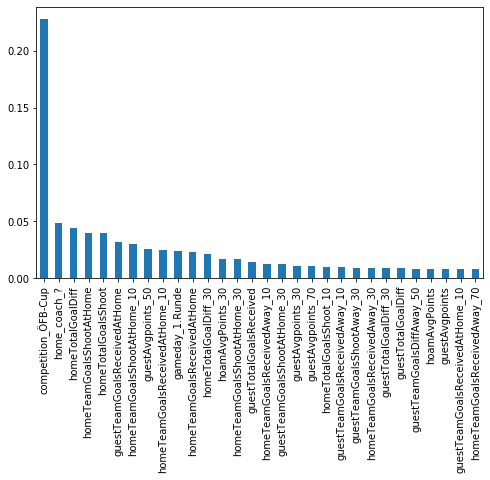

In [255]:
feat_imp = pd.Series(rfr.feature_importances_, index=X_train.columns)
plt.figure(figsize=(8,5))
feat_imp.nlargest(30).plot(kind='bar')

In [50]:
val(rfr)

0.6603 0.3397 1.0
   pred_test  actual_test  calc_test
0   0.339919          0.0   0.000000
1   1.163828         -1.0  -1.163828
2   0.273059          1.0   0.273059
3  -1.138081         -4.0   4.552323
4   0.803919          1.0   0.803919

 0.679 0.321 1.0
   pred_train  actual_train  calc_train
0    0.351871           1.0    0.351871
1    0.338490           1.0    0.338490
2   -0.853499           1.0   -0.853499
3    1.238312           1.0    1.238312
4   -1.371171          -1.0    1.371171


In [256]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfr, random_state=123).fit(X_test, y_test)

In [257]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=None )

Weight,Feature
0.0579 ± 0.0061,competition_ÖFB-Cup
0.0060 ± 0.0031,guestTeamGoalsReceivedAtHome
0.0055 ± 0.0041,homeTotalGoalsShoot
0.0043 ± 0.0042,homeTeamGoalsShootAtHome
0.0038 ± 0.0019,guestAvgpoints_50
0.0038 ± 0.0034,homeTeamGoalsReceivedAtHome_10
0.0036 ± 0.0040,homeTotalGoalDiff
0.0035 ± 0.0018,homeTeamGoalsReceivedAtHome
0.0026 ± 0.0034,homeTeamGoalsShootAtHome_10
0.0024 ± 0.0014,homeTotalGoalsShoot_10


In [258]:
num_cols = list(X.select_dtypes(exclude=object).columns)

In [259]:
num_feats = 30

In [260]:
feature_name = X.columns.tolist()

In [261]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

30 selected features


In [262]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler


X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()


print(str(len(chi_feature)), 'selected features')

30 selected features


In [265]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=159, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()


print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 1272 features.


C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 1113 features.


C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 954 features.


C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 795 features.


C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 636 features.


C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 477 features.


C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 318 features.


C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting estimator with 159 features.


C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


30 selected features


In [266]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


30 selected features


In [267]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

30 selected features


In [268]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

30 selected features


In [274]:
# put all selection together
feature_selection_df = pd.DataFrame(
    {
        'Feature':feature_name,
        'Pearson':cor_support,
        'Chi-2':chi_support,
        'RFE':rfe_support,
        'Logistics':embeded_lr_support,
        'Random Forest':embeded_rf_support,
        'LightGBM':embeded_lgb_support
    })

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.to_csv('../importance/feature-selection-' + t.asctime().replace(' ', '-').replace(':', '-') + '.csv')
feature_selection_df.head(150)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,gameday_1.Runde,True,True,True,True,False,False,4
2,competition_ÖFB-Cup,True,True,True,True,False,False,4
3,home_team_name_Red Bull Salzburg,False,True,True,True,False,False,3
4,home_team_name_FC Kufstein,False,True,True,True,False,False,3
5,home_coach_Peter Zeidler,False,True,True,True,False,False,3
6,hoamAvgPoints,True,False,True,True,False,False,3
7,guestTeamGoalsReceivedAtHome,False,False,True,False,True,True,3
8,guestTeamGoalsDiffAway_90,False,False,True,False,True,True,3
9,time_15:30,False,False,True,True,False,False,2
10,htb_>15,True,True,False,False,False,False,2


In [361]:
important_features = feature_selection_df[feature_selection_df.Total>0]['Feature']

In [373]:
#Validation function
n_folds = 3

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train[important_features].values)
    rmse= np.sqrt(-cross_val_score(model, X_train[important_features].values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [374]:
rfr = RandomForestRegressor(n_estimators=15, max_depth=4)

score = rmsle_cv(rfr)
print("\nRF score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RF score: 1.9360 (0.0326)



In [364]:
rfr.fit(X_train[important_features], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [368]:
from sklearn.metrics import mean_squared_error

In [370]:
mean_squared_error(y_test, rfr.predict(X_test[important_features]))

4.07589507788807

In [ ]:
mse.

In [367]:
rfr.score(X_test[important_features], y_test)

0.17850147368807634